# Numerical Calculus

<div align='center'><img src='https://raw.githubusercontent.com/PC-FSU/ISC_3313_2022/master/images/newton.gif' width='35%'/></div>

In science and engineering (and lots of other disciplines), a common task is to evaluate derivatives or integrals. 

You probably already know how to take the derivative of a function, and how to compute (certain) integrals by hand (analytically). Often however, evaluating these quantities can be challenging or impossible analytically. 

Using a computer, we can come up with an approximation to these quantities.

# Derivatives

In calculus you learn how to take the derivative of a function. For example:

- $ \frac{\text{d}}{\text{d}x} x^2 = 2x$

- $ \frac{\text{d}}{\text{d}x} \sin(x) = \cos(x)$

Using the chain rule and product rule, we can compute more complicated derivatives:

$$ \frac{\text{d}}{\text{d}x} \sin(x^2\cos(e^x)) = ?$$

So what's the problem? Using the chain rule and product rule may be cumbersome, but it's possible. 

Well that's true. But what about a function like this:

$$ f(x) = \prod\limits_{k=1}^{100} x^k\left(\sin\left(k\prod\limits_{m=1}^k xe^{\cos^{m}(x^2)}\right)\right).$$

Would you want to take the derivative of that?

It turns out that seeing functions like that isn't actually very common in most applications. 

Most functions you have to deal with can be differentiated by applying the chain rule once or twice. 

A more common task however, is to compute the derivative of function without being given $f(x)$. 

Consider a running app that keeps track of the runner's position at discrete time intervals. 

The data might look like:

- time (s): 0, 10, 20, 30, 40
- distance (m): 0, 50, 100, 120, 125


How fast is the runner running at $t=20$? 

We know that velocity is the time derivative of the position, i.e. 

$$v(t) = \frac{d\,x(t)}{dt}$$

How can we compute this from the data provided by the app?

## Finite Difference
 
Remember from early calculus when you learned the definition of the derivative. 

Given a function $y(x)$, the derivative $y'(x)$ is defined by the limit:

$$ y'(x) = \lim\limits_{\Delta x\to 0} \frac{y(x + \Delta x) - y(x)}{\Delta x} $$

We can think of this as the limit of the slope of the secant line going through $f(x)$ and $f(x + \Delta x)$.

<div align='center'><img src='https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter2/images/derivative.gif?raw=true/'/></div>

The exact definition of a derivative involves the limit which is impossible to compute. 

If we are willing to sacrifice some accuracy, we can *approximate* the derivative of a function by:

$$ f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}.$$

For large $\Delta x$ this might be a bad approximation, but as $\Delta x$ becomes closer to 0, the approximation becomes better. This is known as *finite difference*. 

We can use this formula to answer a question from earlier. Given this time vs. distance data, how fast is the runner running at $t=20$?

In other words, if we call our distance function $x(t)$, what is $x'(20)$? 

I always recommend plotting your data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

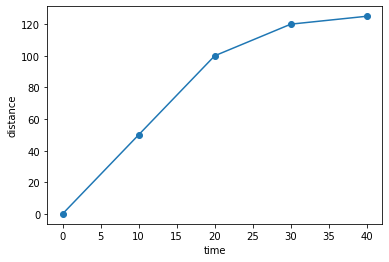

In [2]:
t = np.array([0,10,20,30,40])
x = np.array([0,50,100,120,125])

plt.plot(t,x, "-o")
plt.xlabel("time") 
plt.ylabel("distance");

The finite difference formula is essentially a calculation of the slope of the line that connects $x(20)$ and $x(30)$. 

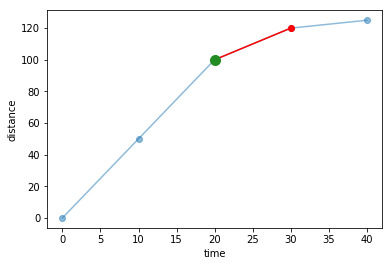

In [3]:
plt.plot(t,x, "-o",alpha=0.5)
plt.plot(t[2:4],x[2:4], "-or") 
plt.plot(t[2], x[2], 'o', color='forestgreen', markersize=10)
plt.xlabel("time"); plt.ylabel("distance");

From our finite difference formula:
$$ x'(20) \approx \frac{x(20 + \Delta t) - x(20)}{\Delta t}.$$

We know $x(20) = 100$. What is $\Delta t$? 

From our data we can see that if we take $\Delta t=10$, we can evaluate $x(20 + \Delta t) = x(30) = 120$. 

Plugging this all in:
$$ v(20) = x'(20) \approx \frac{120 - 100}{10} = 2 \text{m/s}.$$

## Exercise

Calculate the runners velocity at each data point between $t = [0, 30]$ and store it in a variable $v$. 

Note that using this scheme we can't calculate the velocity for the final point. 

Try to make the calculation using numpy operations and slicing instead of loops. 

In [7]:
t = np.array([0,10,20,30,40])
x = np.array([0,50,100,120,125])

Delta_x = x[1:]-x[:-1]
Delta_t = 10

velocity = Delta_x/Delta_t
velocity

array([5. , 5. , 2. , 0.5])

The method used here is know as *forward finite difference* because we are using the point $f(t + \Delta t)$ to approximate the derivative.

We can also define a *backward finite difference*:

$$ f'(t) \approx \frac{f(t) - f(t-\Delta t)}{\Delta t}.$$

Or a *centered finite difference*:

$$ f'(t) \approx \frac{f(t + \Delta t) - f(t -\Delta t)}{2\Delta t}$$

In fact there are many other finite difference schemes, but we'll limit ourselves to these three.

We won't go into the details but each finite difference scheme has an error associated with it. 

Central difference is more accurate than forward/backward difference but there is a problem when calculating the derivatives at the end points, like we saw in the example.

- Backward finite difference excludes the initial point
- Forward finite difference excludes the final point
- Central finite difference excludes both!

## Exercise

Calculate the runners velocity using forward finite difference for $t=0$, central finite difference for $10\leq t<40$ and backward finite difference for $t=40$. Combine the results into a single numpy array $v$.

Make a 2x1 subplot with the runners time vs position on top and the runners time vs velocity on the bottom. 

Text(0, 0.5, 'velocity')

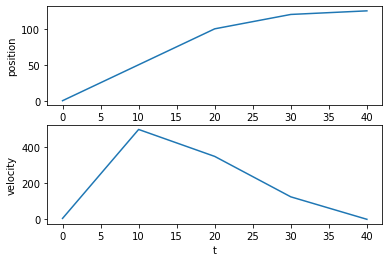

In [14]:
t = np.array([0,10,20,30,40])
x = np.array([0,50,100,120,125])

velocity = np.array([0,0,0,0,0])
delta_t = 10

#forward_diff
velocity[0] = (x[1] - x[0]) / delta_t

#central_diff
velocity[1:4] = (x[2:] - x[:3])/2*delta_t

#backward_diff
velocity[-1] = (x[-1] - x[-2]) / delta_t


fig,ax = plt.subplots(2,1)
ax[0].plot(t,x)
ax[0].set_xlabel("t")
ax[0].set_ylabel("position")

ax[1].plot(t,velocity)
ax[1].set_xlabel("t")
ax[1].set_ylabel("velocity")

# Integration

The reverse of differentiation is integration. In  many applications we need to integrate a function, i.e.

$$\int_0^{\pi} \sin(x)\text{d}x$$

This is easy enough. We know the antiderivative of $\sin(x)$ is $-\cos(x)$, so applying the fundamental theorem of calculus gives:
$$ \int_0^{\pi} \sin(x)\text{d}x = -\cos(\pi) - (-\cos(0)) = -(-1) + 1 = 2$$

What about the integral
$ \int_0^1 e^{-x^2}\text{d}x$ ? 

You may remember from calculus that $e^{-x^2}$ does not have an antiderivative. 

Unlike differentiation, where finding analytic expressions can be tedious, but is almost always possible, finding an analytic expression for an integral is often not possible. 

Of course, just because we don't have an antiderivative doesn't mean we don't have an integral. 

Remember that the integral above is simply "the area under the curve $y = e^{-x^2}$ from $x=0$ to $x=1$". 

This value still exists.

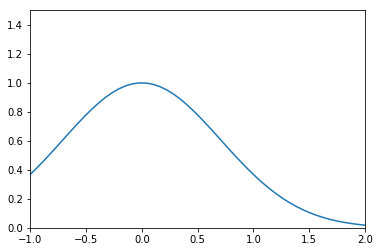

In [4]:
x = np.linspace(-1,2)
plt.plot(x, np.exp(-x**2))
plt.xlim([-1,2]); plt.ylim([0,1.5]);

When you first learned about integrals you probably went over Riemann sums to evaluate $\int_a^b f(x)\text{d}x$. 

Riemann Sums Review:

- We begin by breaking up the interval of integration $[a,b]$ into intervals of length $h$. 

- Then the value of the function at a point $x^*$ in each interval (typically either right endpoint, left endpoint or center) determines a rectangle of height $f(x^*)$ and width $h$. 

- The integral of $f(x)$ over $[a,b]$ is then approximated by the total area of these rectangles. 

You'll recall that as $h\to 0$, this approximation converges to the actual value of the integral. 

<div align='center'><img src='https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter2/images/left_sum.png?raw=true' width='50%'></div>

Mathematically:

1) we split the domain $[a,b]$ into $N$ equally spaced intervals of width $h$

2) we take a point from each interval to form a set of points $\{x_1, x_2, \ldots, x_N\}$

3) $\int_a^b f(x)\text{d}x \approx h\sum\limits_{i=1}^N f(x_i)$

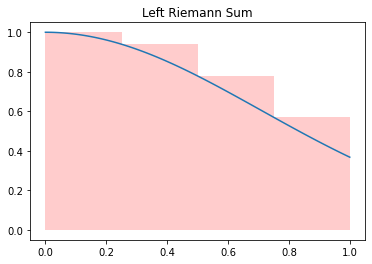

In [17]:
x_rem = [0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1]
y_rem = [np.exp(0), np.exp(0), np.exp(-0.25**2), np.exp(-0.25**2), \
        np.exp(-0.5**2), np.exp(-0.5**2), np.exp(-0.75**2), np.exp(-0.75**2)]

plt.fill_between(x_rem, 0, y_rem, facecolor="r", alpha = 0.2)
x = np.linspace(0,1,100)
plt.plot(x, np.exp(-x**2))
plt.title("Left Riemann Sum");

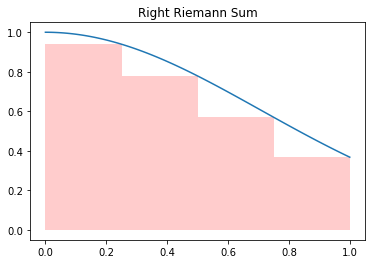

In [18]:
x_rem = [0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1]
y_rem = [np.exp(-0.25**2), np.exp(-0.25**2), np.exp(-0.5**2), np.exp(-0.5**2), \
        np.exp(-0.75**2), np.exp(-0.75**2), np.exp(-1), np.exp(-1)]
plt.fill_between(x_rem, 0, y_rem, facecolor="r", alpha = 0.2)
x = np.linspace(0,1,100)
plt.plot(x, np.exp(-x**2))
plt.title("Right Riemann Sum");

In the limit $h\to 0$ this converges to the actual integral. 

Of course even if $h$ is not 0, it tells us something about the integral. 

As with finite differences, if we are willing to accept some error, we can take a non-zero $h$ and get an approximation to the integral. 

If $N$ is large enough (and consequently $h$ is small enough), this approximation might be quite good.

Lets look at how we could compute this. 

As a specific example we'll look at an integral we already know how to compute, and see how accurate we can get. 

Specifically we'll look at $\int_0^{\pi} \sin(x)\text{d}x = 2$.

The first thing we need to do is define the intervals. 

Say we want $N$ intervals, this means we'll need $N+1$ points and $h = \pi/N$.

In [23]:
N = 4
a = 0
b = np.pi
h = (b - a)/N
x = np.linspace(a, b, N + 1) # N intervals -> N + 1 points
print(x)

[0.         0.78539816 1.57079633 2.35619449 3.14159265]


Lets do the left Riemann sum. 

This means that we need the left endpoint of each interval. In our case this will be the points $\{0, \pi/4, \pi/2, 3\pi/4\}$, or all points except the last one. 

In [20]:
print(x[:-1])

[0.         0.78539816 1.57079633 2.35619449]


We now need to plug these values into our function, sum the function values up and multiply by $h$. 

In [21]:
I = np.sum(np.sin(x[:-1]))*h
print("error = ", abs(I - 2))

error =  0.1038811020629602


This isn't bad, but it's still off by about 5%. What happens if instead of 5 points we use 100 points?

In [22]:
N = 100
a = 0
b = np.pi
h = (b - a)/N
x = np.linspace(a, b, N + 1)
I = np.sum(np.sin(x[:-1]))*h
print("error = ", abs(I - 2))

error =  0.0001644961125564226


## Exercise

Use the right Riemann sum with 25, 50 and 100 intervals to evaluate the integral

$$ \int_0^{10} \sin(x)^2\text{d}x.$$

The exact value is $5 - \sin(20)/4$.

- Plot the errors against the number of intervals.

- Try creating a function called `right_riemann` which takes parameters, `f` for an arbitrary function, `N` for the number of points and `a` and `b` for the end points. 

Test out your function on the $\int_0^{\pi} \sin(x)$ example from earlier.

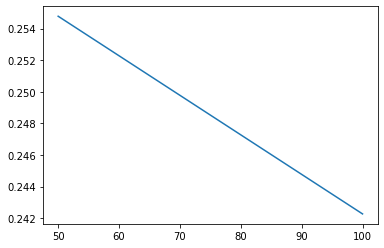

In [27]:
def fun(x):
    return np.sin(x)**2

exactValue = 5

# First part
N_list = [50,50,100]
b = 10
a = 0

def left_riemann(f,N,a,b):
    exactValue = 5
    h = (b-a)/N
    x = np.linspace(a, b, N + 1)
    fx = f(x[:-1])
    I = np.sum(fx)*h
    error = abs(I - exactValue)
    return error

error_list = []
for N in N_list:
    error_list.append(left_riemann(fun,N,a,b))
    
plt.plot(N_list,error_list)

#second_part
#chnage x[:-1] to x[1:]

